# GameStop game reviews: How do sentiment and review content of GameStop's video game product reviews influence customer recommendations and product ratings?

## 1. Module Import

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Data Preparation

In [45]:
df = pd.read_csv('../data/gamestop_product_reviews_dataset_sample.csv')

In [46]:
df.shape

(4686, 20)

In [47]:
df.head()

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,NaN,My new OLED is a upgrade and it's great! This...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,16/01/2022 16:17:56
1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable....,yes: I recommend this product,NaN,0,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,16/01/2022 16:17:56
2,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,EC82,Quality,I’m quite pleased with the entire product as a...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229174444,178b3b03-2c56-5abc-a016-c74c2633c9c2,16/01/2022 16:17:56
3,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Weeto,Unbelievable picture quality!,I’ve only had my new Visio OLED65 mounted and ...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,2.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229167959,16e925e3-1e59-537e-aa67-1675b613d351,16/01/2022 16:17:56
4,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,LexusSC400,Vizio OLED,The picture is very crisp and the blacks very ...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229131414,bc017585-3bc1-5a37-9e58-f0bed6de9a72,16/01/2022 16:17:56


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 4686 non-null   object 
 1   name                4686 non-null   object 
 2   brand               4686 non-null   object 
 3   sku                 4686 non-null   int64  
 4   reviewer_name       4686 non-null   object 
 5   review_title        4621 non-null   object 
 6   review_description  4686 non-null   object 
 7   recommended_review  4686 non-null   object 
 8   verifed_purchaser   2406 non-null   object 
 9   helpful_count       4686 non-null   int64  
 10  not_helpful_count   4686 non-null   int64  
 11  reviewed_at         4686 non-null   object 
 12  images              166 non-null    object 
 13  rating              4686 non-null   float64
 14  average_rating      4686 non-null   float64
 15  reviews_count       4686 non-null   int64  
 16  review

In [49]:
df['sku'] = df['sku'].astype(str)
df['comment_id'] = df['comment_id'].astype(str)

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df.isna().sum()

url                      0
name                     0
brand                    0
sku                      0
reviewer_name            0
review_title            65
review_description       0
recommended_review       0
verifed_purchaser     2280
helpful_count            0
not_helpful_count        0
reviewed_at              0
images                4520
rating                   0
average_rating           0
reviews_count            0
reviews_link             0
comment_id               0
uniq_id                  0
scraped_at               0
dtype: int64

In [52]:
# Fill missing values in 'verifed_purchaser' with 'unknown'
df['verifed_purchaser'].fillna('unknown', inplace=True)
df.isna().sum()

/var/folders/01/g1vgr0ks4139hz98k4c2r3nr0000gn/T/ipykernel_31300/3389699437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['verifed_purchaser'].fillna('unknown', inplace=True)


url                      0
name                     0
brand                    0
sku                      0
reviewer_name            0
review_title            65
review_description       0
recommended_review       0
verifed_purchaser        0
helpful_count            0
not_helpful_count        0
reviewed_at              0
images                4520
rating                   0
average_rating           0
reviews_count            0
reviews_link             0
comment_id               0
uniq_id                  0
scraped_at               0
dtype: int64

In [53]:
df['brand'].unique()

array(['VIZIO', 'Microsoft', 'Nintendo', 'Square Enix', 'Little Orbit',
       'PowerA', 'Maximum Games', 'Hasbro', 'Jazwares', 'Ja-Ru',
       'ENHANCE', 'License 2 Play', 'Capcom', 'XSEED Games', 'LucidSound',
       'Jada Toys', 'Warner Bros. Interactive Entertainment', 'Sony',
       'PhatMojo', 'Deep Silver', 'Electronic Arts', 'U&I Entertainment',
       'RIG', 'Bandai', 'THQ Nordic', 'Funko', 'JVC', 'Honey-Can-Do',
       'Paladone', 'Skinit', 'AreYouGame', 'Toynk', 'McFarlane Toys',
       'KidKraft', "Rubie's Costume Company", 'Ubisoft', 'Garmin',
       'Big Ben', 'EPOS', 'Rayovac', '2K Games', 'InComm', 'PopCap Games',
       'SEGA', 'Samsung', 'PNP Depot', 'Energizer', 'Bethesda Softworks',
       'Yok', 'GPX', 'Apple', 'LucasArts', 'Aluratek',
       'Bioworld Merchandising', 'D3 Publisher of America', 'Geeknet',
       'Rockstar Games', 'Merge Games', 'Hyperkin', 'Replay Games',
       'Uncanny Brands', 'Activision', 'Turtle Beach',
       'Learning Resources', 'WITHit', 

In [54]:
def extract_category_from_url(url):
    if 'video-games' in url:
        return 'video games'
    elif 'electronics' in url:
        return 'electronics'
    elif 'controllers' in url:
        return 'controllers'
    else:
        return 'other'

# Apply the function to the 'url' column to create a 'category' column
df['category'] = df['url'].apply(extract_category_from_url)
print(df['category'].unique())

['electronics' 'controllers' 'video games' 'other']


category
video games    2436
other          1001
electronics     886
controllers     363
Name: count, dtype: int64


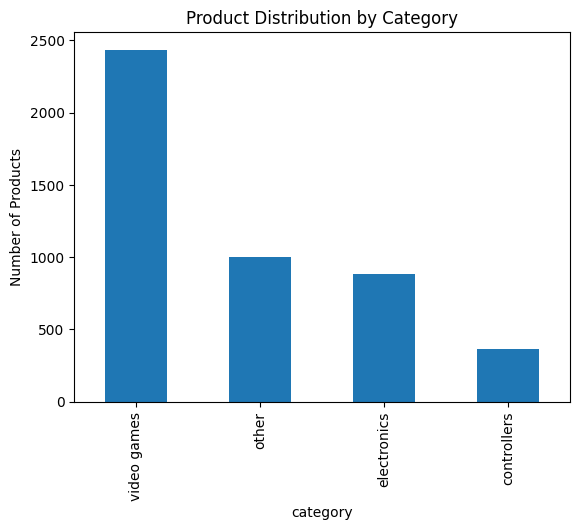

In [55]:
# Distribution of products across categories
category_distribution = df['category'].value_counts()
print(category_distribution)

# Plot the distribution for a visual overview
category_distribution.plot(kind='bar', title="Product Distribution by Category")
plt.ylabel("Number of Products")
plt.show()

In [56]:
# Filter the dataset for video game reviews
video_game_reviews = df[df['category'] == 'video games']

# Check the number of video game reviews
print(f"Number of video game reviews: {video_game_reviews.shape[0]}")
video_game_reviews.head()

Number of video game reviews: 2436


,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,...,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at,category
20,https://www.gamestop.com/video-games/nintendo-...,Yoshi's Crafted World - Nintendo Switch,Nintendo,191609,Pitbull91101,Yoshi switch game,Yoshi game was awesome and still playing it th...,No: I don’t recommend this product,Verified Purchaser,0,...,2 years ago,NaN,5.0,4.6556,2390,https://www.gamestop.com/on/demandware.store/S...,127432481,540015d7-27e3-50f6-b66b-8646416c0cfb,16/01/2022 16:17:57,video games
21,https://www.gamestop.com/video-games/nintendo-...,Yoshi's Crafted World - Nintendo Switch,Nintendo,191609,Mykd,Awesome game if you like the Mario brothers ga...,Great game. You will enjoy it. Good price wort...,No: I don’t recommend this product,Verified Purchaser,0,...,2 years ago,NaN,5.0,4.6556,2390,https://www.gamestop.com/on/demandware.store/S...,127430959,00bd1c61-b1e9-5996-9cb2-68f647941463,16/01/2022 16:17:57,video games
22,https://www.gamestop.com/video-games/nintendo-...,Yoshi's Crafted World - Nintendo Switch,Nintendo,191609,Chigg,Awsome game...,"My son loves to play this game, he's been play...",No: I don’t recommend this product,Verified Purchaser,0,...,2 years ago,NaN,5.0,4.6556,2390,https://www.gamestop.com/on/demandware.store/S...,127420280,5cf58f8e-75b2-555b-b9ac-0edb49219337,16/01/2022 16:17:57,video games
23,https://www.gamestop.com/video-games/nintendo-...,Yoshi's Crafted World - Nintendo Switch,Nintendo,191609,Prieto56,Awesome Game for Children!,The game is great for a family and younger chi...,No: I don’t recommend this product,Verified Purchaser,0,...,2 years ago,NaN,5.0,4.6556,2390,https://www.gamestop.com/on/demandware.store/S...,127414142,992506c3-cb1d-5a05-afc6-cce6a4a437fd,16/01/2022 16:17:57,video games
24,https://www.gamestop.com/video-games/nintendo-...,Yoshi's Crafted World - Nintendo Switch,Nintendo,191609,Iz B,Poochy,It would be better if Poochy was in all of the...,No: I don’t recommend this product,Verified Purchaser,1,...,2 years ago,NaN,4.0,4.6556,2390,https://www.gamestop.com/on/demandware.store/S...,127414207,70c3cefe-763a-5aca-9b7d-5bd2b36c5595,16/01/2022 16:17:57,video games


In [57]:
video_game_reviews.shape

(2436, 21)

In [67]:
video_game_reviews.loc[:, 'recommended_binary'] = video_game_reviews['recommended_review'].str.split(':').str[0].str.strip().apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Verify the column has been created
print(video_game_reviews[['recommended_review', 'recommended_binary']].head())

                    recommended_review  recommended_binary
20  No: I don’t recommend this product                   0
21  No: I don’t recommend this product                   0
22  No: I don’t recommend this product                   0
23  No: I don’t recommend this product                   0
24  No: I don’t recommend this product                   0


## 3. Sentiment Analysis

In [71]:
from textblob import TextBlob

# Define a function to calculate the sentiment score
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  

# Apply the function to calculate sentiment score for each review
video_game_reviews.loc[:,'sentiment_score'] = video_game_reviews['review_description'].apply(calculate_sentiment)
video_game_reviews[['review_description', 'sentiment_score']].head()

,review_description,sentiment_score
20,Yoshi game was awesome and still playing it th...,0.32500
21,Great game. You will enjoy it. Good price wort...,0.37619
22,"My son loves to play this game, he's been play...",0.30000
23,The game is great for a family and younger chi...,0.02000
24,It would be better if Poochy was in all of the...,0.50000


In [69]:
# Define sentiment categories based on sentiment score
video_game_reviews.loc[:, 'sentiment_category'] = pd.cut(
    video_game_reviews['sentiment_score'], bins=[-1, -0.01, 0.25, 1], labels=['negative', 'neutral', 'positive']
)

print(video_game_reviews[['sentiment_score', 'sentiment_category']].head())

    sentiment_score sentiment_category
20          0.32500           positive
21          0.37619           positive
22          0.30000           positive
23          0.02000            neutral
24          0.50000           positive


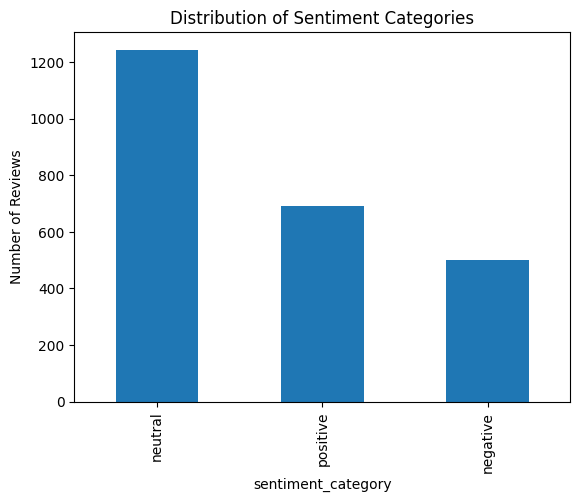

sentiment_category
neutral     1243
positive     690
negative     502
Name: count, dtype: int64


In [72]:
# Count the number of reviews in each sentiment category
sentiment_distribution = video_game_reviews['sentiment_category'].value_counts()

# Plot sentiment distribution
sentiment_distribution.plot(kind='bar', title='Distribution of Sentiment Categories')
plt.ylabel('Number of Reviews')
plt.show()

print(sentiment_distribution)

### - Average rating by sentiment

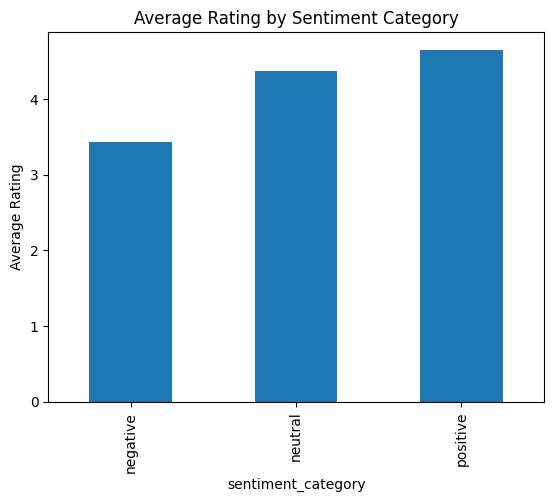

sentiment_category
negative    3.426295
neutral     4.374899
positive    4.652174
Name: rating, dtype: float64


In [75]:
# Average rating for each sentiment category
avg_rating_by_sentiment = video_game_reviews.groupby('sentiment_category', observed=True)['rating'].mean()

# Plot the average rating by sentiment category
avg_rating_by_sentiment.plot(kind='bar', title='Average Rating by Sentiment Category')
plt.ylabel('Average Rating')
plt.show()

print(avg_rating_by_sentiment)

### - Recommendation rate by sentiment

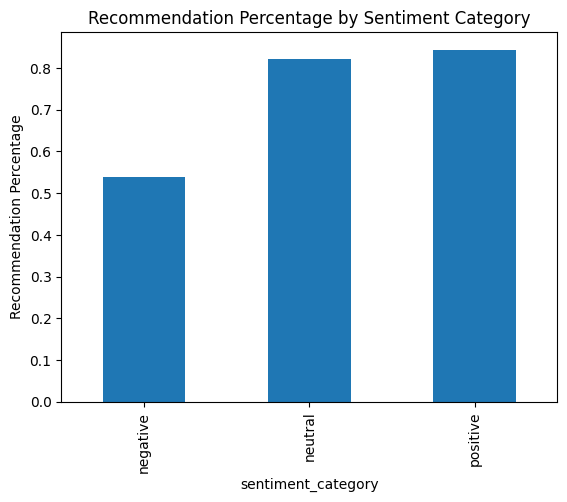

sentiment_category
negative    0.537849
neutral     0.822204
positive    0.843478
Name: recommended_binary, dtype: float64


In [77]:
recommendation_by_sentiment = video_game_reviews.groupby('sentiment_category', observed=True)['recommended_binary'].mean()

# Plot the recommendation rate by sentiment category
recommendation_by_sentiment.plot(kind='bar', title='Recommendation Percentage by Sentiment Category')
plt.ylabel('Recommendation Percentage')
plt.show()

print(recommendation_by_sentiment)


In [63]:
# Correlation between sentiment score and rating
correlation = video_game_reviews['sentiment_score'].corr(video_game_reviews['rating'])
print(f"Correlation between Sentiment Score and Rating: {correlation}")

Correlation between Sentiment Score and Rating: 0.3753348253760543


#### Key Insights: a moderate positive relationship
- More positive sentiment is associated with higher product ratings for video games.
- The correlation is not strong, meaning that there are likely other factors (e.g., product features, customer expectations) that also play a role in determining the final rating.

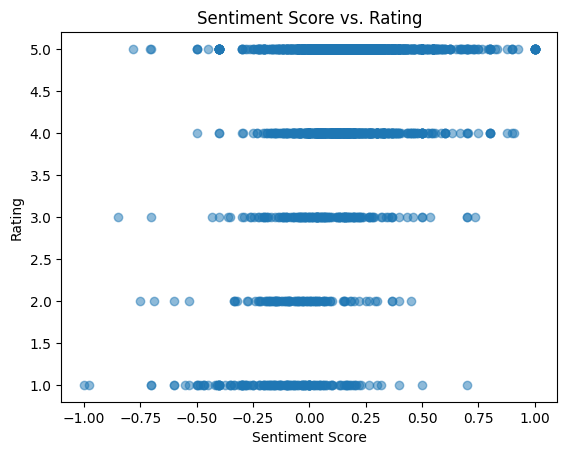

In [64]:
plt.scatter(video_game_reviews['sentiment_score'], video_game_reviews['rating'], alpha=0.5)
plt.title('Sentiment Score vs. Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.show()

####
- Outliers: some outliers where the sentiment score is high, but the rating is low (and vice versa).

In [78]:
# Correlation between sentiment score and recommendation
correlation_sentiment_recommendation = video_game_reviews['sentiment_score'].corr(video_game_reviews['recommended_binary'])
print(f"Correlation between Sentiment Score and Recommendation: {correlation_sentiment_recommendation}")

Correlation between Sentiment Score and Recommendation: 0.25331341300898946


#### Key Insights: a weak positive correlation
- While positive sentiment is somewhat associated with recommending the product, other factors might also influence the decision to recommend.
- Other factors might influence on recommendations

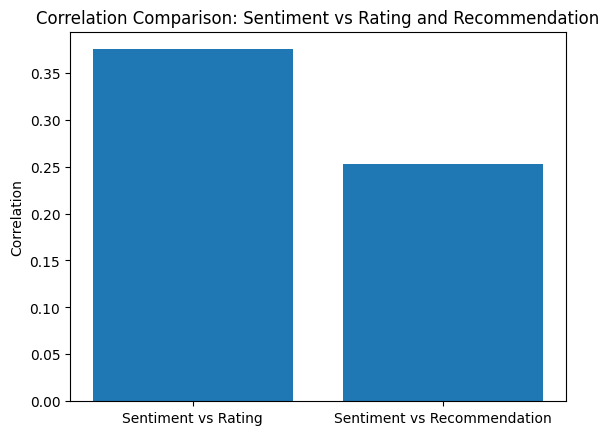

In [79]:
import matplotlib.pyplot as plt

# Correlation values
correlations = {'Sentiment vs Rating': 0.375, 'Sentiment vs Recommendation': 0.253}

# Create a bar plot
plt.bar(correlations.keys(), correlations.values())
plt.title('Correlation Comparison: Sentiment vs Rating and Recommendation')
plt.ylabel('Correlation')
plt.show()

### ? Why customers recommend despite negative sentiment or Why they don’t recommend despite positive sentiment?

In [80]:
# Filter negative sentiment reviews where the product was still recommended
negative_recommended_reviews = video_game_reviews[
    (video_game_reviews['sentiment_category'] == 'negative') & (video_game_reviews['recommended_binary'] == 1)
]

print(f"Number of negative reviews with recommendations: {len(negative_recommended_reviews)}")
print(negative_recommended_reviews[['review_description', 'rating', 'sentiment_score']].head())

Number of negative reviews with recommendations: 270
                                    review_description  rating  \
123  This game, in my opinion, is WAAY better than ...     5.0   
163  If you like yoshi, you can’t go wrong here. Ga...     5.0   
165  Fun game, but too short.  Beat the game after ...     4.0   
191  There's so much replay value with this game.\r...     5.0   
231  Good game. kinda on the kid side of game, my k...     5.0   

     sentiment_score  
123        -0.041429  
163        -0.120833  
165        -0.166667  
191        -0.020000  
231        -0.033333  


In [81]:
# Filter positive sentiment reviews where the product was not recommended
positive_not_recommended_reviews = video_game_reviews[
    (video_game_reviews['sentiment_category'] == 'positive') & (video_game_reviews['recommended_binary'] == 0)
]

print(f"Number of positive reviews without recommendations: {len(positive_not_recommended_reviews)}")
print(positive_not_recommended_reviews[['review_description', 'rating', 'sentiment_score']].head())

Number of positive reviews without recommendations: 108
                                   review_description  rating  sentiment_score
20  Yoshi game was awesome and still playing it th...     5.0          0.32500
21  Great game. You will enjoy it. Good price wort...     5.0          0.37619
22  My son loves to play this game, he's been play...     5.0          0.30000
24  It would be better if Poochy was in all of the...     4.0          0.50000
50  Tons of fun to play with my kids! They love th...     5.0          0.50000


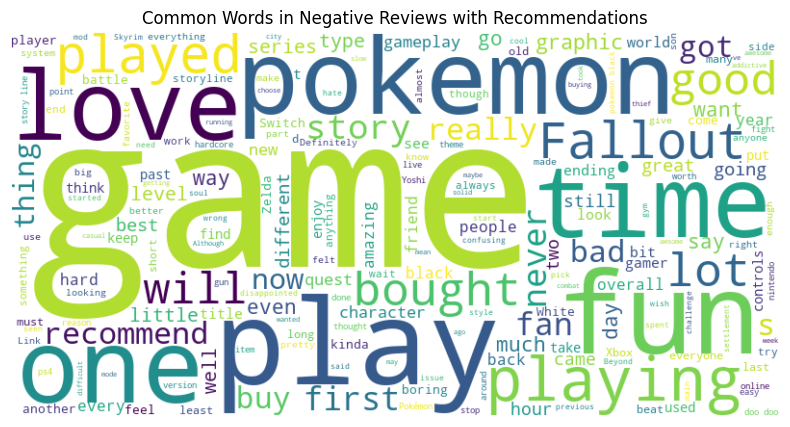

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Negative sentiment with recommendations

negative_recommended_text = ' '.join(negative_recommended_reviews['review_description'])

# Generate a word cloud
wordcloud_neg_rec = WordCloud(width=800, height=400, background_color='white').generate(negative_recommended_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg_rec, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Negative Reviews with Recommendations')
plt.show()

#### Key Insights:
- Despite negative sentiment, words like "love," "fun," "recommend" suggest that customers still find enjoyment and satisfaction in the product.
- Words like "play," "time," "fun," "love" indicate that these customers might appreciate specific aspects of the game, such as entertainment value or nostalgia, even though they may have issues with other elements.

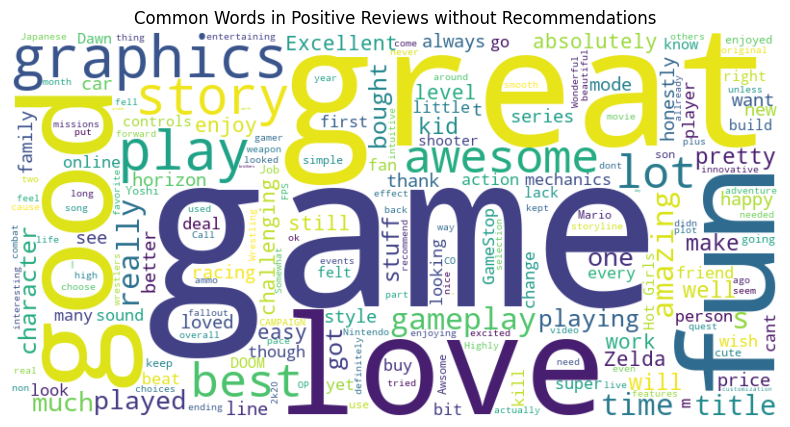

In [84]:
## Positive sentiment without recommendations

positive_not_recommended_text = ' '.join(positive_not_recommended_reviews['review_description'])

# Generate a word cloud
wordcloud_pos_not_rec = WordCloud(width=800, height=400, background_color='white').generate(positive_not_recommended_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos_not_rec, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Positive Reviews without Recommendations')
plt.show()

#### Key Insights:
- With words like "great," "awesome," "love," "good," and "play," customers still choose not to recommend the product. This could indicate that while customers enjoy the product, there might be specific issues preventing a recommendation.
- The word "graphics" appears prominently, suggesting that while customers appreciate the visual aspects of the game, other factors (perhaps gameplay mechanics, pricing, or value) could be preventing a recommendation.